In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [2]:
#데이터 수집
x,y = make_blobs(random_state=1)

## K-means

In [3]:
kmeans = KMeans(n_clusters=3)
#모델 선정(군집 3개)
kmeans.fit(x,y)
#모델 학습

KMeans(n_clusters=3)

In [4]:
print(kmeans.labels_)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [5]:
print(kmeans.predict(x))
#(kmeans.labels_)==(kmeans.predict(x))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


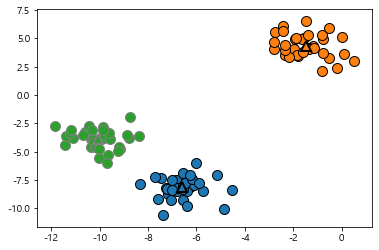

In [6]:
#K-means 시각화
mglearn.discrete_scatter(x[:,0],x[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                         kmeans.cluster_centers_[:,1],
                        [0,1,2],
                        markers='^',markeredgewidth=2) #center 시각화
plt.show()

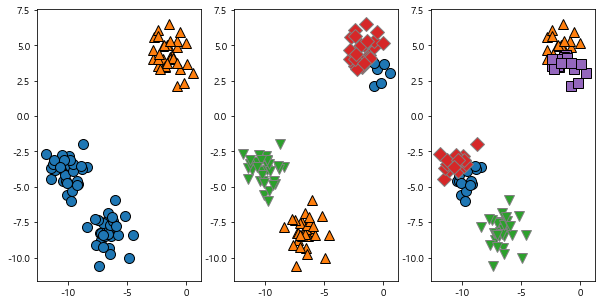

In [7]:
fig,axes=plt.subplots(1,3,figsize=(10,5))

#k가 2개
kmeans2 = KMeans(n_clusters=2) #모델선정
kmeans2.fit(x) #모델 학습
assignments2 = kmeans2.labels_

mglearn.discrete_scatter(x[:,0],x[:,1],assignments2,ax=axes[0])

#k 4개

kmeans4 = KMeans(n_clusters=4) #모델선정
kmeans4.fit(x) #모델 학습
assignments4 = kmeans4.labels_

mglearn.discrete_scatter(x[:,0],x[:,1],assignments4,ax=axes[1])

#k 5개

kmeans5 = KMeans(n_clusters=5) #모델선정
kmeans5.fit(x) #모델 학습
assignments5 = kmeans5.labels_

mglearn.discrete_scatter(x[:,0],x[:,1],assignments5,ax=axes[2])

## K-maens 실패사례

In [8]:
x,y=make_blobs(n_samples=200,
              cluster_std=[1.0,2.5,0.5],
              random_state=170)

y_pred=KMeans(n_clusters=3,random_state=0).fit_predict(x)

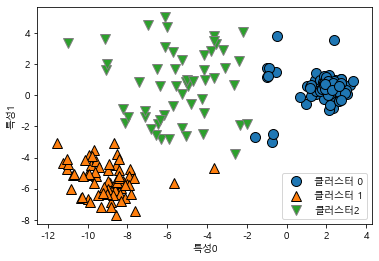

In [9]:
mglearn.discrete_scatter(x[:,0],x[:,1],y_pred)
plt.legend(['클러스터 0','클러스터 1','클러스터2'],loc='best')
plt.xlabel('특성0')
plt.ylabel('특성1')
plt.show()

In [10]:
x,y=make_blobs(n_samples=600,
              random_state=170)
rng=np.random.RandomState(74)

#데이터가 길게 늘어지도록 변경
transformation = rng.normal(size=(2,2))
x=np.dot(x,transformation)

In [11]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)
y_pred = kmeans.predict(x)

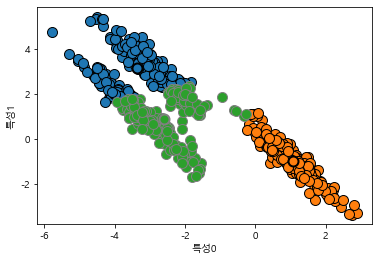

In [12]:
mglearn.discrete_scatter(x[:,0],x[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                         kmeans.cluster_centers_[:,1],
                         [0,1,2],markers='o',markeredgewidth=2)
plt.xlabel('특성0')
plt.ylabel('특성1')
plt.show()

In [13]:
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=200,noise=0.05,random_state=0)

kmeans = KMeans(n_clusters=2) #모델선정
kmeans.fit(x) #모델 학습
y_pred = kmeans.predict(x) #예측값 

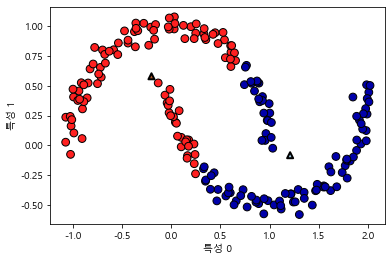

In [14]:
#그래프 시각화
plt.scatter(x[:,0],x[:,1],c=y_pred,cmap=mglearn.cm2,s=60,edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           marker='^',c=range(kmeans.n_clusters),linewidth=2,cmap='Paired',
           edgecolors='k')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()